# 2


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("passengers2.csv")

Восполнение предыдущими значениями

In [35]:
df['target_ffill'] = df['target'].fillna(method='ffill')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3400\2458316193.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['target_ffill'] = df['target'].fillna(method='ffill')


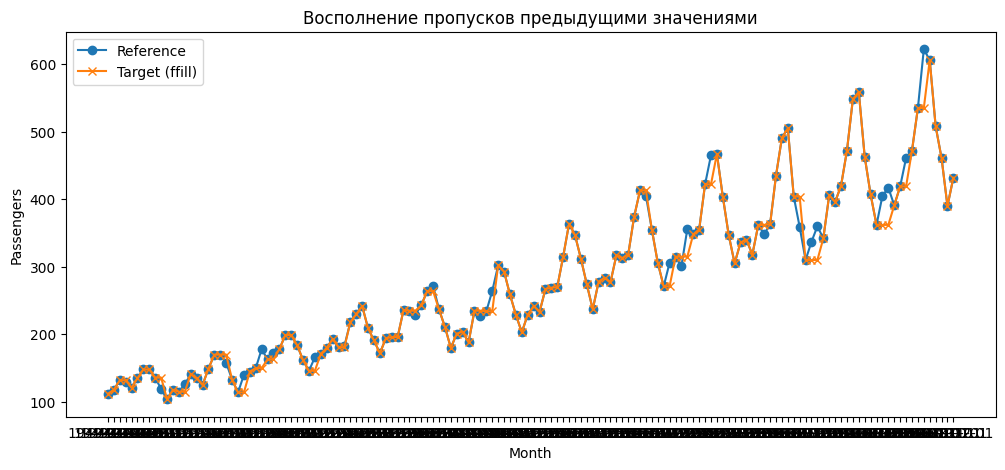

In [36]:
plt.figure(figsize=(12, 5))
plt.plot(df['Month'], df['reference'], label='Reference', marker='o')
plt.plot(df['Month'], df['target_ffill'], label='Target (ffill)', marker='x')
plt.title("Восполнение пропусков предыдущими значениями")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.legend()
plt.show()

Скользящее среднее (двумя способами)

In [37]:
df['target_ma'] = df['target']
for i in range(len(df)):
    if pd.isna(df.loc[i, 'target_ma']):
        window_values = df['target_ma'].iloc[max(0, i-3):i]  # три предыдущих
        df.loc[i, 'target_ma'] = window_values.mean()


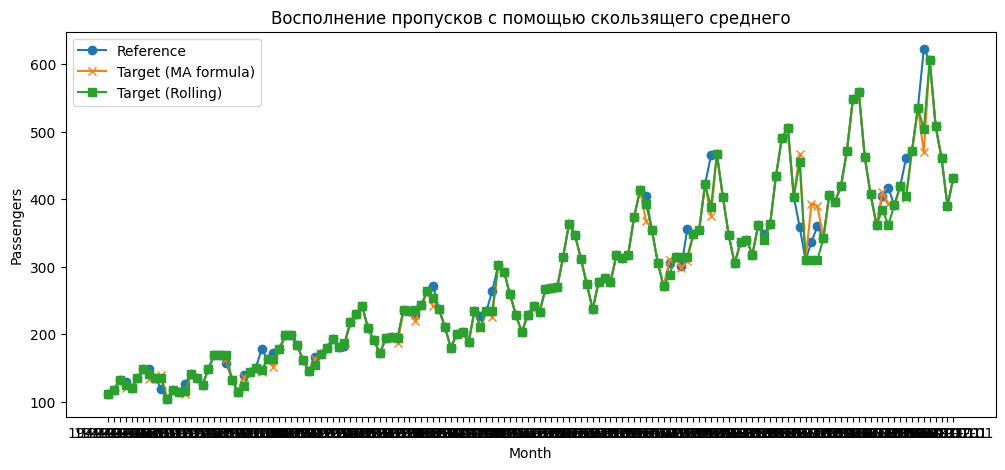

In [38]:
df['target_rolling'] = df['target'].fillna(df['target'].rolling(window=3, min_periods=1).mean())

plt.figure(figsize=(12, 5))
plt.plot(df['Month'], df['reference'], label='Reference', marker='o')
plt.plot(df['Month'], df['target_ma'], label='Target (MA formula)', marker='x')
plt.plot(df['Month'], df['target_rolling'], label='Target (Rolling)', marker='s')
plt.title("Восполнение пропусков с помощью скользящего среднего")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.legend()
plt.show()


Интерполяция (формула и interpolate)

In [39]:
df['target_interp_formula'] = df['target'].copy()

for i in range(len(df)):
    if pd.isna(df.loc[i, 'target_interp_formula']):
        x = i
        # ищем предыдущую и следующую ненулевую
        prev_idx = df['target_interp_formula'][:i].last_valid_index()
        next_idx = df['target_interp_formula'][i+1:].first_valid_index()
        if prev_idx is not None and next_idx is not None:
            x0, y0 = prev_idx, df.loc[prev_idx, 'target_interp_formula']
            x1, y1 = next_idx, df.loc[next_idx, 'target_interp_formula']
            df.loc[i, 'target_interp_formula'] = y0 + (y1 - y0) * (x - x0) / (x1 - x0)


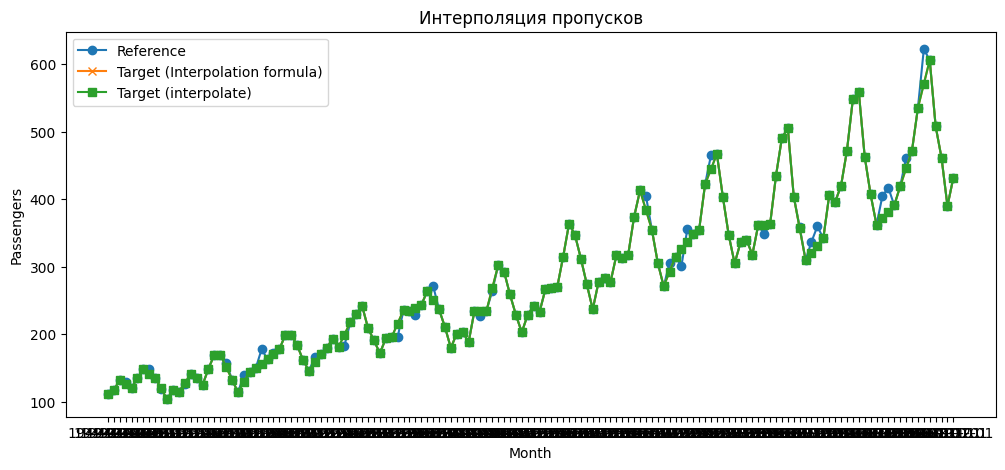

In [40]:
df['target_interp'] = df['target'].interpolate(method='linear')

plt.figure(figsize=(12, 5))
plt.plot(df['Month'], df['reference'], label='Reference', marker='o')
plt.plot(df['Month'], df['target_interp_formula'], label='Target (Interpolation formula)', marker='x')
plt.plot(df['Month'], df['target_interp'], label='Target (interpolate)', marker='s')
plt.title("Интерполяция пропусков")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.legend()
plt.show()


Экспоненциальное сглаживание (формула и ewm)

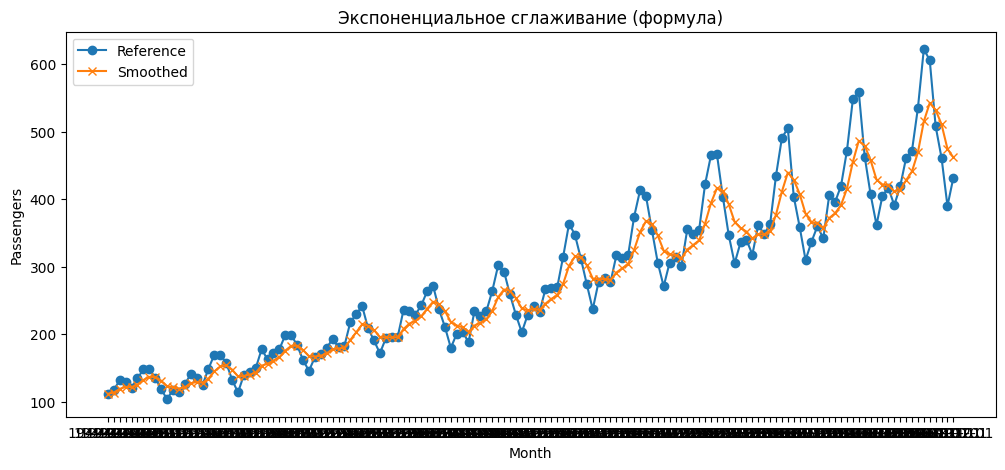

In [41]:
alpha = 0.3  
S = [df['reference'][0]] 

for t in range(1, len(df)):
    S.append(alpha * df['reference'][t] + (1-alpha) * S[-1])

df['reference_smooth'] = S

plt.figure(figsize=(12, 5))
plt.plot(df['Month'], df['reference'], label='Reference', marker='o')
plt.plot(df['Month'], df['reference_smooth'], label='Smoothed', marker='x')
plt.title("Экспоненциальное сглаживание (формула)")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.legend()
plt.show()


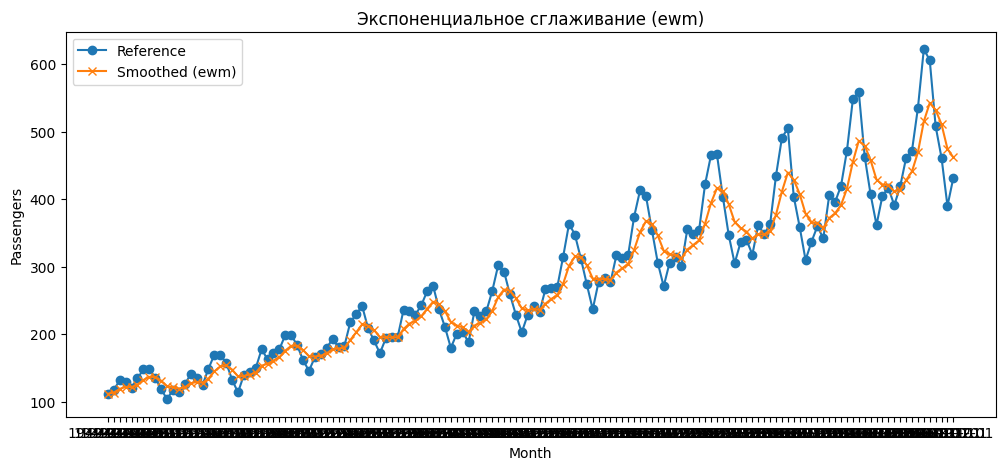

In [42]:
df['reference_ewm'] = df['reference'].ewm(alpha=0.3, adjust=False).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['Month'], df['reference'], label='Reference', marker='o')
plt.plot(df['Month'], df['reference_ewm'], label='Smoothed (ewm)', marker='x')
plt.title("Экспоненциальное сглаживание (ewm)")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.legend()
plt.show()


# 3


In [43]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('passengers.csv', parse_dates=['Month'], index_col='Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Сезонность


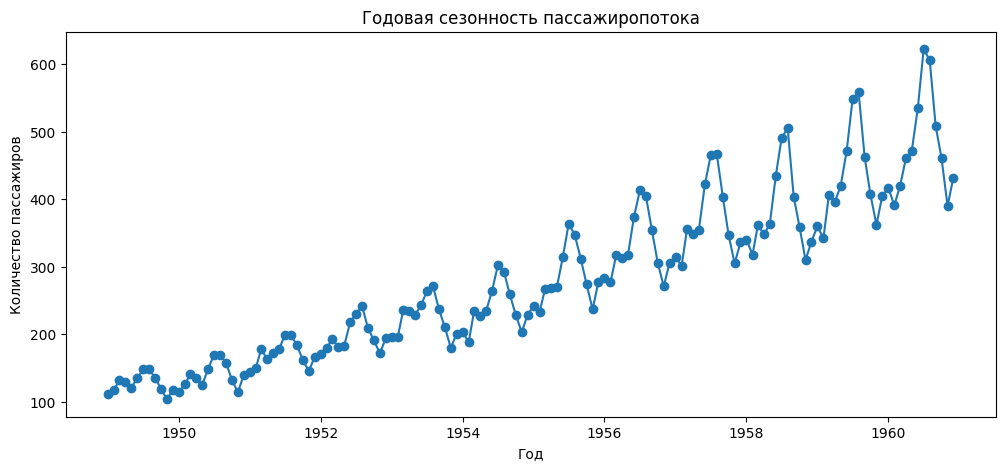

In [44]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['#Passengers'], marker='o')
plt.title("Годовая сезонность пассажиропотока")
plt.xlabel("Год")
plt.ylabel("Количество пассажиров")
plt.show()


Отдельные месяцы

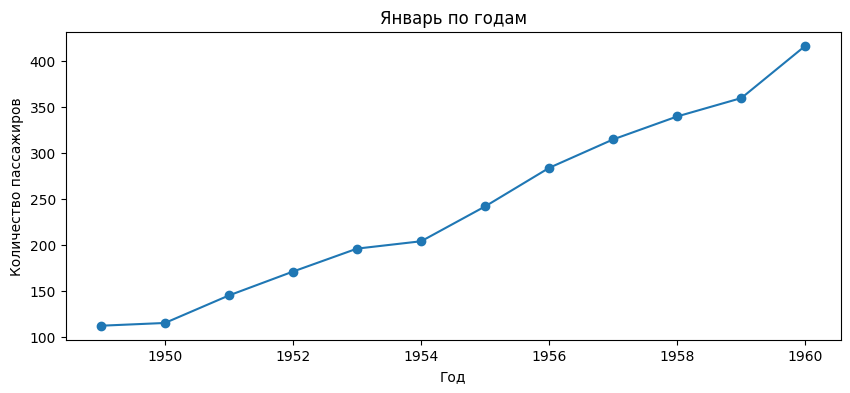

In [45]:
jan = df[df.index.month == 1]
plt.figure(figsize=(10,4))
plt.plot(jan.index.year, jan['#Passengers'], marker='o')
plt.title("Январь по годам")
plt.xlabel("Год")
plt.ylabel("Количество пассажиров")
plt.show()


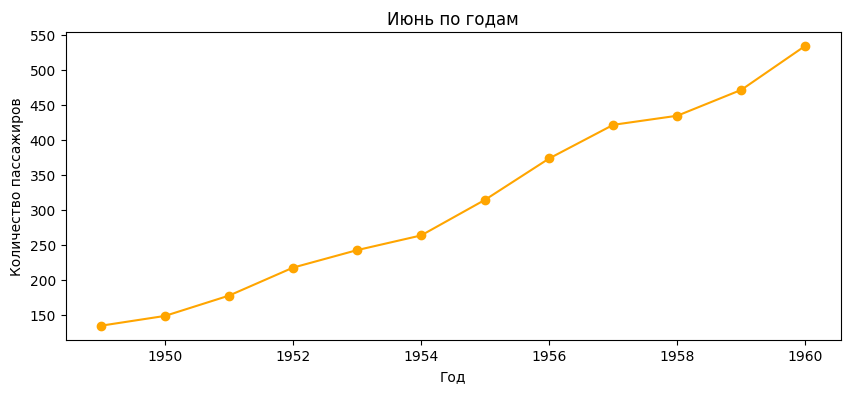

In [46]:
jun = df[df.index.month == 6]
plt.figure(figsize=(10,4))
plt.plot(jun.index.year, jun['#Passengers'], marker='o', color='orange')
plt.title("Июнь по годам")
plt.xlabel("Год")
plt.ylabel("Количество пассажиров")
plt.show()


сред и дисп по годам

In [47]:
yearly_stats = df.resample('Y').agg(['mean', 'var'])  # mean и variance
print(yearly_stats)


           #Passengers             
                  mean          var
Month                              
1949-12-31  126.666667   188.242424
1950-12-31  139.666667   363.696970
1951-12-31  170.166667   339.969697
1952-12-31  197.000000   527.454545
1953-12-31  225.000000   810.363636
1954-12-31  238.916667  1219.719697
1955-12-31  284.000000  1775.818182
1956-12-31  328.250000  2290.750000
1957-12-31  368.416667  3351.356061
1958-12-31  381.000000  4164.181818
1959-12-31  428.333333  4876.242424
1960-12-31  476.166667  6043.060606


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3400\1869866871.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_stats = df.resample('Y').agg(['mean', 'var'])  # mean и variance


разности по месяцам


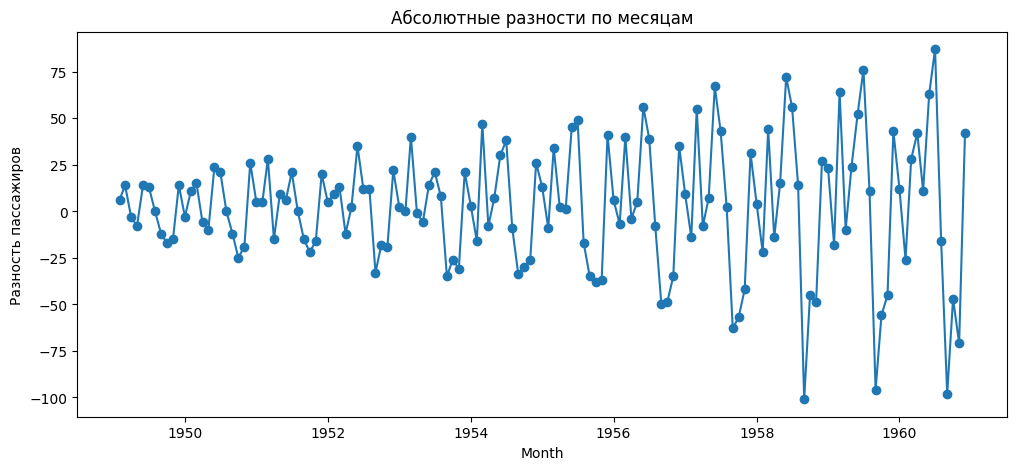

In [48]:
df['abs_diff'] = df['#Passengers'].diff()
plt.figure(figsize=(12,5))
plt.plot(df.index, df['abs_diff'], marker='o')
plt.title("Абсолютные разности по месяцам")
plt.xlabel("Month")
plt.ylabel("Разность пассажиров")
plt.show()


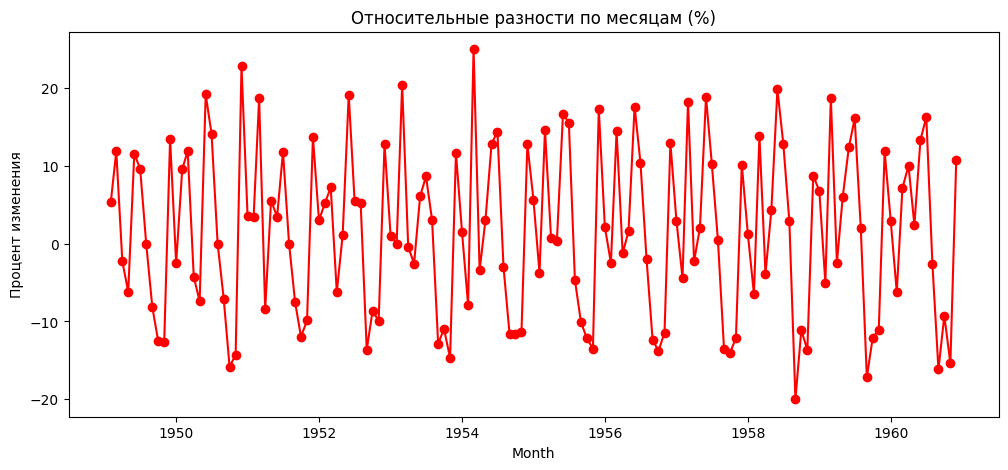

In [49]:
df['pct_diff'] = df['#Passengers'].pct_change() * 100
plt.figure(figsize=(12,5))
plt.plot(df.index, df['pct_diff'], marker='o', color='red')
plt.title("Относительные разности по месяцам (%)")
plt.xlabel("Month")
plt.ylabel("Процент изменения")
plt.show()


частота дискретизации

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3400\872310879.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').mean()


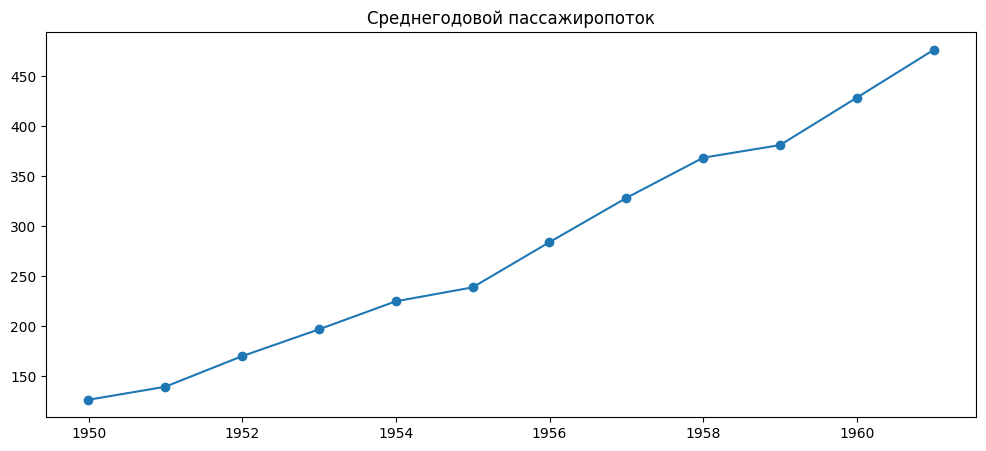

In [50]:
df_yearly = df.resample('Y').mean()
plt.figure(figsize=(12,5))
plt.plot(df_yearly.index, df_yearly['#Passengers'], marker='o')
plt.title("Среднегодовой пассажиропоток")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3400\3288683461.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample('Q').mean()


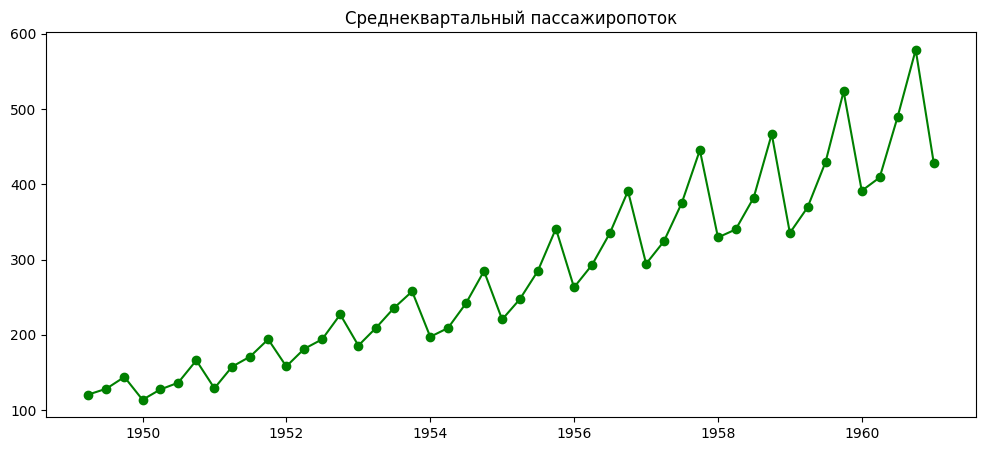

In [51]:
df_quarterly = df.resample('Q').mean()
plt.figure(figsize=(12,5))
plt.plot(df_quarterly.index, df_quarterly['#Passengers'], marker='o', color='green')
plt.title("Среднеквартальный пассажиропоток")
plt.show()


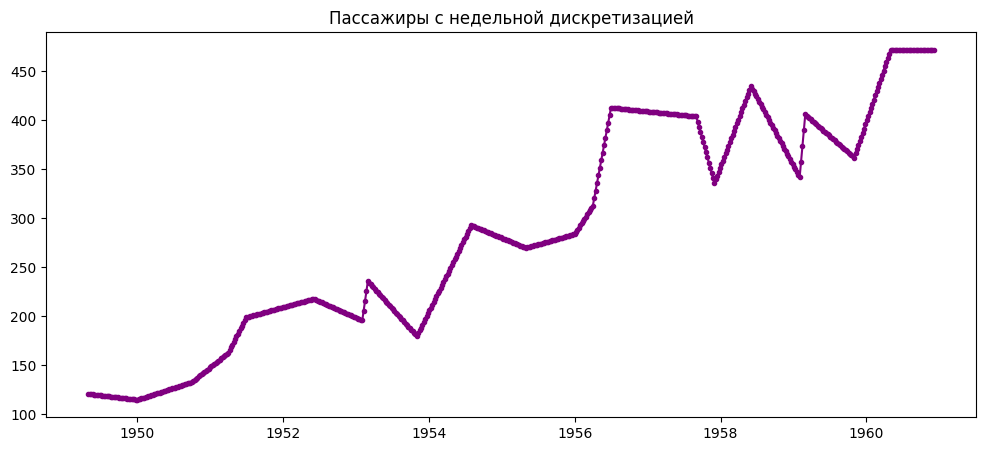

In [52]:
df_weekly = df.resample('W').interpolate()  # линейная интерполяция
plt.figure(figsize=(12,5))
plt.plot(df_weekly.index, df_weekly['#Passengers'], marker='.', color='purple')
plt.title("Пассажиры с недельной дискретизацией")
plt.show()


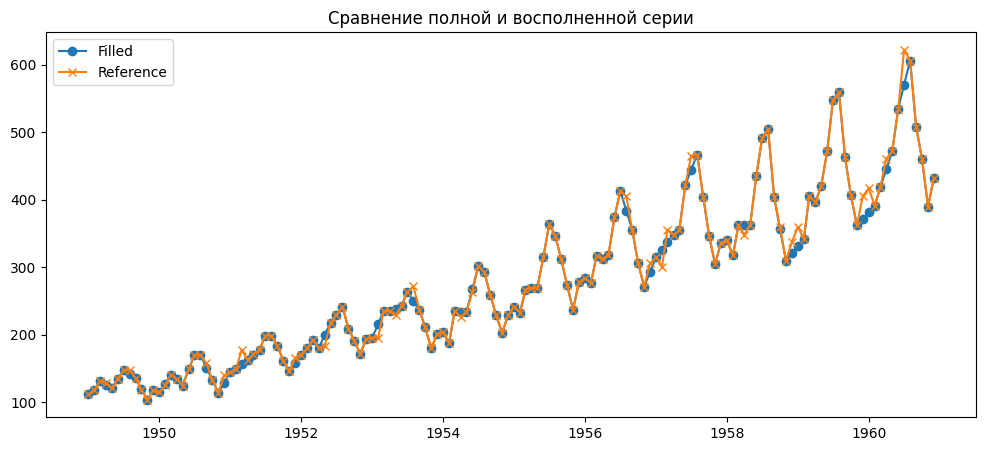

In [53]:

df2 = pd.read_csv('passengers2.csv', parse_dates=['Month'], index_col='Month')

df2['Passengers_filled'] = df2['target'].interpolate(method='linear')

# Повторяем шаги 1-5
# Годовая сезонность
plt.figure(figsize=(12,5))
plt.plot(df2.index, df2['Passengers_filled'], marker='o', label='Filled')
plt.plot(df.index, df['#Passengers'], marker='x', label='Reference')
plt.title("Сравнение полной и восполненной серии")
plt.legend()
plt.show()


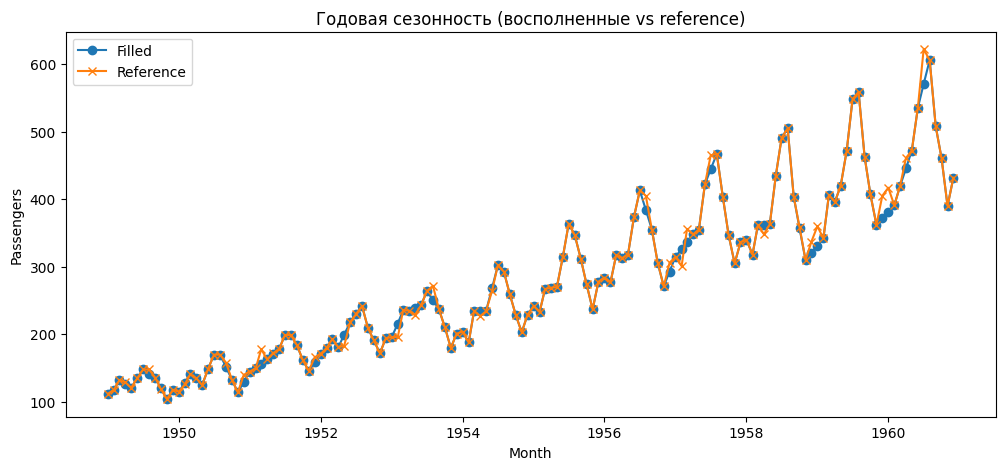

In [54]:
plt.figure(figsize=(12,5))
plt.plot(df2.index, df2['Passengers_filled'], marker='o', label='Filled')
plt.plot(df2.index, df2['reference'], marker='x', label='Reference')
plt.title("Годовая сезонность (восполненные vs reference)")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.legend()
plt.show()


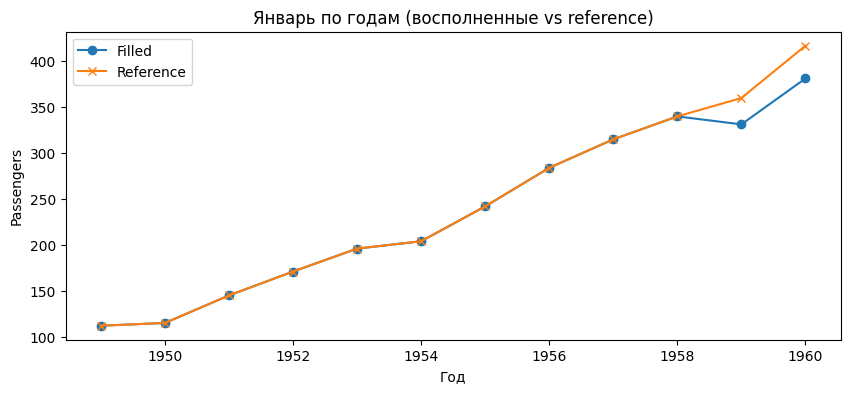

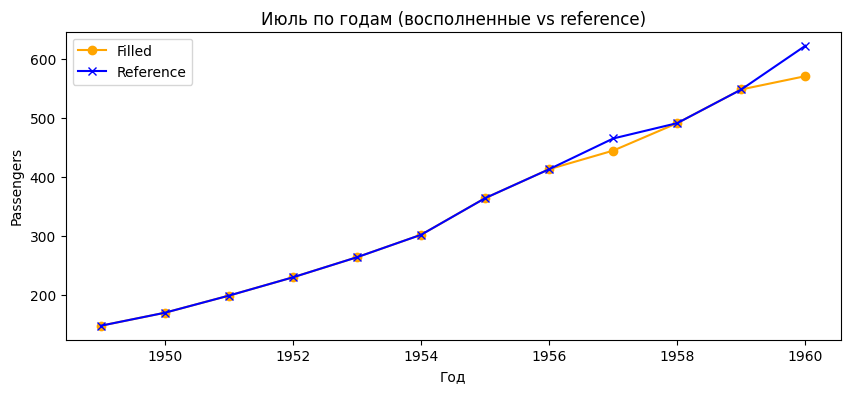

In [55]:
# Январь
jan2 = df2[df2.index.month == 1]
plt.figure(figsize=(10,4))
plt.plot(jan2.index.year, jan2['Passengers_filled'], marker='o', label='Filled')
plt.plot(jan2.index.year, jan2['reference'], marker='x', label='Reference')
plt.title("Январь по годам (восполненные vs reference)")
plt.xlabel("Год")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# Июль
jul2 = df2[df2.index.month == 7]
plt.figure(figsize=(10,4))
plt.plot(jul2.index.year, jul2['Passengers_filled'], marker='o', label='Filled', color='orange')
plt.plot(jul2.index.year, jul2['reference'], marker='x', label='Reference', color='blue')
plt.title("Июль по годам (восполненные vs reference)")
plt.xlabel("Год")
plt.ylabel("Passengers")
plt.legend()
plt.show()


In [56]:
yearly_stats2 = df2['Passengers_filled'].resample('Y').agg(['mean', 'var'])
print(yearly_stats2)


                  mean          var
Month                              
1949-12-31  126.041667   166.020833
1950-12-31  138.416667   348.946970
1951-12-31  167.625000   354.823864
1952-12-31  198.375000   508.142045
1953-12-31  225.708333   615.384470
1954-12-31  239.875000  1227.278409
1955-12-31  284.000000  1775.818182
1956-12-31  325.416667  2096.992424
1957-12-31  367.208333  2854.066288
1958-12-31  380.680556  4259.466961
1959-12-31  423.166667  5520.414141
1960-12-31  467.611111  5402.708754


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3400\3711212920.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_stats2 = df2['Passengers_filled'].resample('Y').agg(['mean', 'var'])


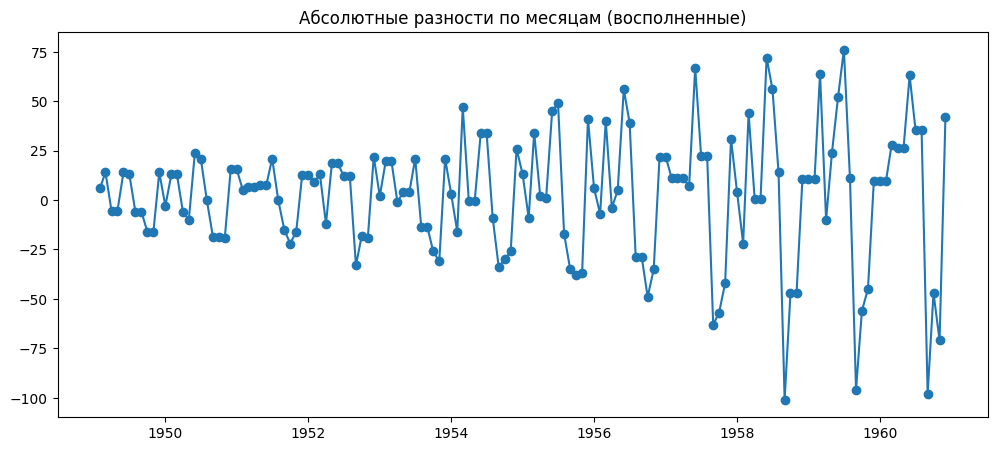

In [57]:
df2['abs_diff'] = df2['Passengers_filled'].diff()
plt.figure(figsize=(12,5))
plt.plot(df2.index, df2['abs_diff'], marker='o')
plt.title("Абсолютные разности по месяцам (восполненные)")
plt.show()


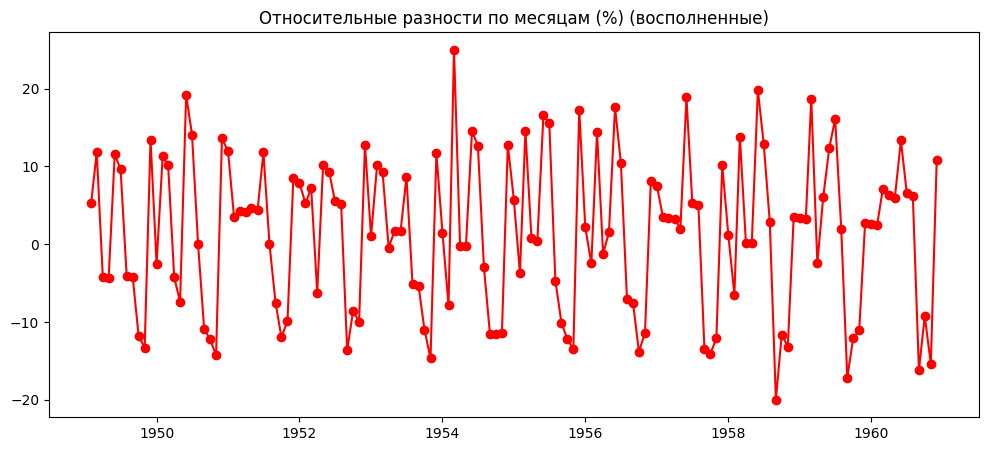

In [58]:
df2['pct_diff'] = df2['Passengers_filled'].pct_change() * 100
plt.figure(figsize=(12,5))
plt.plot(df2.index, df2['pct_diff'], marker='o', color='red')
plt.title("Относительные разности по месяцам (%) (восполненные)")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3400\2912808710.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df2_yearly = df2['Passengers_filled'].resample('Y').mean()


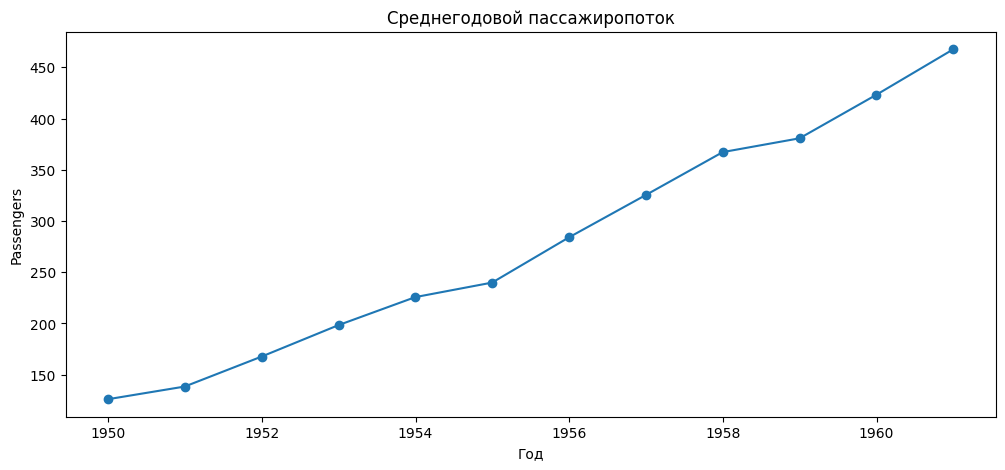

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3400\2912808710.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df2_quarterly = df2['Passengers_filled'].resample('Q').mean()


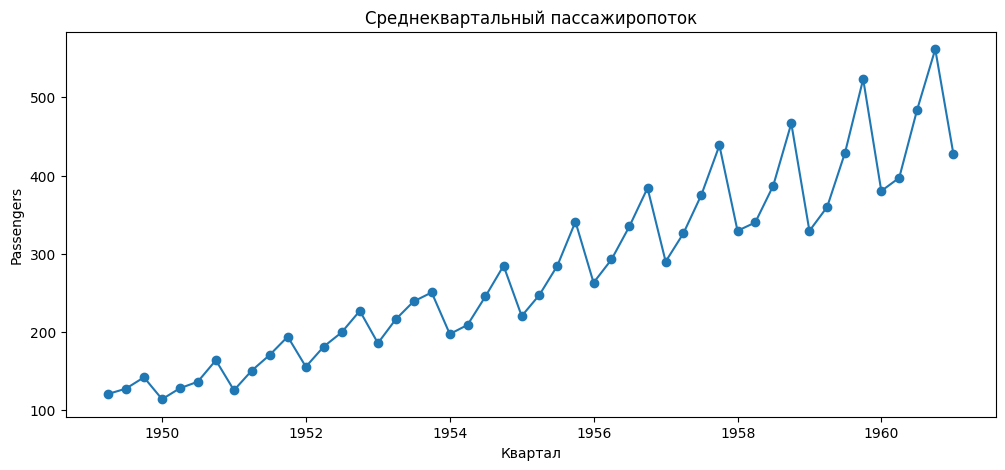

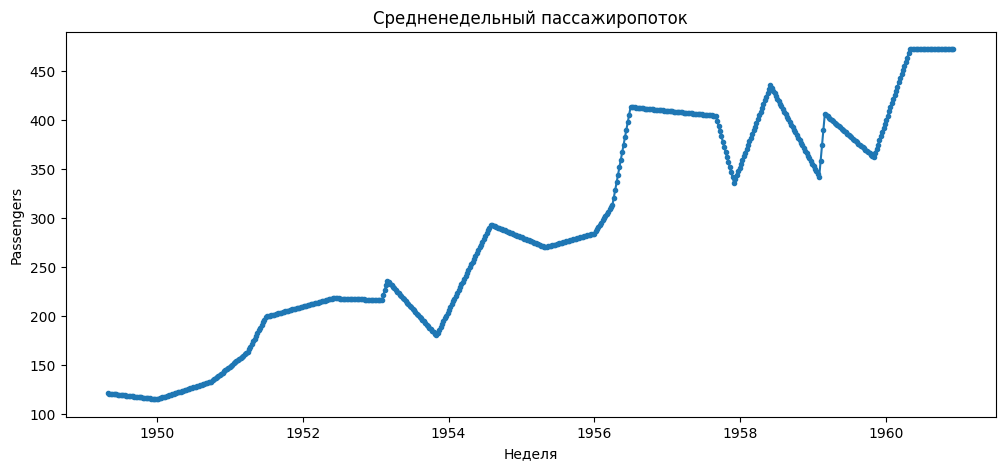

In [ ]:
# До года
df2_yearly = df2['Passengers_filled'].resample('Y').mean()
plt.figure(figsize=(12,5))
plt.plot(df2_yearly.index, df2_yearly, marker='o')
plt.title("Среднегодовой пассажиропоток")
plt.xlabel("Год")
plt.ylabel("Passengers")
plt.show()

# До квартала
df2_quarterly = df2['Passengers_filled'].resample('Q').mean()
plt.figure(figsize=(12,5))
plt.plot(df2_quarterly.index, df2_quarterly, marker='o')
plt.title("Среднеквартальный пассажиропоток")
plt.xlabel("Квартал")
plt.ylabel("Passengers")
plt.show()

# До недели
df2_weekly = df2['Passengers_filled'].resample('W').interpolate()
plt.figure(figsize=(12,5))
plt.plot(df2_weekly.index, df2_weekly, marker='.')
plt.title("Средненедельный пассажиропоток")
plt.xlabel("Неделя")
plt.ylabel("Passengers")
plt.show()